In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
# from scipy import special, integrate
sys.path.insert(0, '/home/aew492/CFE_gradients/code')
import globals
globals.initialize_vals()
import generate_mock_list

### predicted variance in $\xi(r)$

In [15]:
# input power spectrum
PkG_fn='/scratch/ksf293/mocks/lognormal/inputs/cat_L750_n2e-4_z057_patchy_As2x_pkG.dat'
kG, PkG = np.loadtxt(PkG_fn).T
kG.shape, PkG.shape

((436,), (436,))

Text(0.5, 1.0, 'Input galaxy power spectrum')

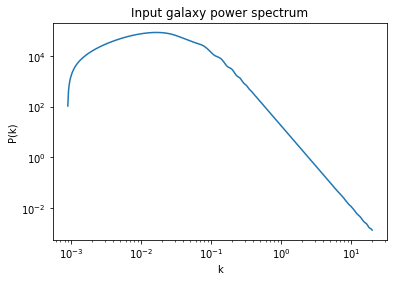

In [16]:
fig, ax = plt.subplots()
ax.plot(kG, PkG)
# ax.set_xlim((0, 0.1))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('k')
ax.set_ylabel('P(k)')
ax.set_title('Input galaxy power spectrum')

In [17]:
def trapezoid(y, x):
    return (dx/2)*(y[0]+2*np.sum(y[1:-1])+y[-1])

In [18]:
# Roman's equation for the VARIANCE of xi at a given r
def xi_err_pred(r, V, n):
    const = (2*np.pi)**5 / V
    # function of k that we want to integrate
    def k_func(k, Pk):
        return (k/r) * (Pk+(1/n))**2 * (special.jv(1/2, k*r))**2
    # construct our array to integrate
    k_func_arr = np.array([k_func(k, PkG[i]) for i, k in enumerate(kG)])
    trapz = trapezoid(k_func_arr, kG)
    return const*trapz

### load in xi results; As1x and As2x

In [19]:
L = 750
n = '2e-4'
MockSet = generate_mock_list.mock_set(L, n, As=2, rlzs=1000)

In [20]:
# load in binned results to get r_avg
MockSet.load_xi_lss()
r_avg = MockSet.r_avg

In [21]:
xi_lss = MockSet.xi_lss
mean_ls = np.mean(xi_lss, axis=0)
std_ls = np.std(xi_lss, axis=0)

### load in predicted variance

In [22]:
r_avg, pred_var = np.load(os.path.join(globals.data_dir, f'predicted_xi_var_L750_n2e-4_z057_patchy_As2x.npy'), allow_pickle=True).T

In [23]:
pred_var

array([10.10371482,  6.60807762,  5.00549351,  4.05950577,  3.21990284,
        2.64110239,  2.07179657,  1.72645417,  1.5128606 ,  1.32738492,
        1.11940206,  0.95134897,  0.78098325,  0.6536826 ,  0.65482042,
        0.57160995,  0.47230713,  0.4631229 ,  0.42854388,  0.37282154,
        0.34466927,  0.31840369])

### plot

No handles with labels found to put in legend.


Text(0.5, 0.98, 'Spread of Landy-Szalay results (1000 rlzs)')

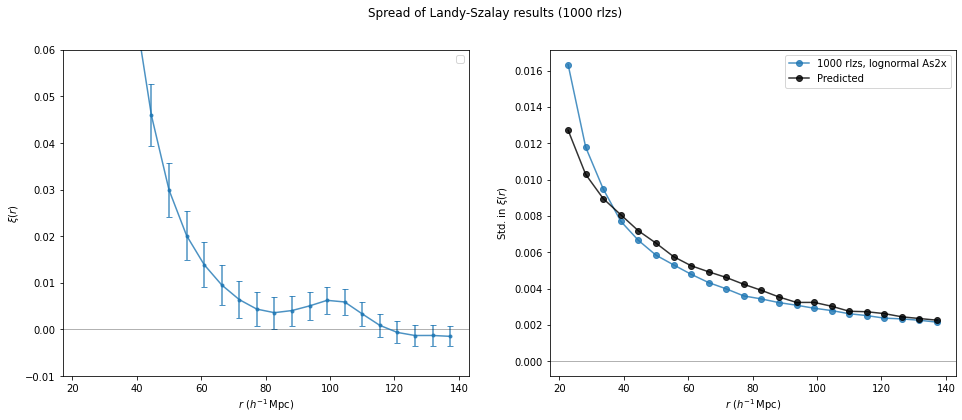

In [25]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(16,6))

ax0.errorbar(r_avg, mean_ls, std_ls, capsize=3, marker='.', alpha=0.8)

ax0.set_ylim((-0.01, 0.06))
ax0.set_ylabel(r"$\xi(r)$")

ax1.plot(r_avg, std_ls, marker='o', alpha=0.8, label='1000 rlzs, lognormal As2x')
ax1.plot(r_avg, np.sqrt(pred_var)/250, marker='o', alpha=0.8, color='k', label='Predicted')

# ax1.set_ylim((-0.001, 0.006))
ax1.set_ylabel(r"Std. in $\xi(r)$")

for ax in [ax0, ax1]:
    ax.axhline(0, color='k', alpha=0.3, lw=1)
    ax.set_xlabel(r"$r$ ($h^{-1}\,$Mpc)")
    ax.legend()

fig.suptitle(f"Spread of Landy-Szalay results ({MockSet.nmocks} rlzs)")

Text(0.5, 0.98, 'Spread of Landy-Szalay results (1000 rlzs)')

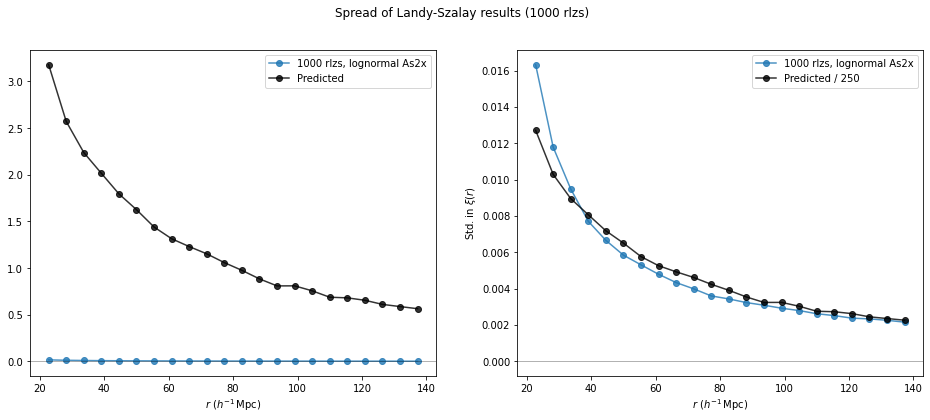

In [27]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(16,6))

ax0.plot(r_avg, std_ls, marker='o', alpha=0.8, label='1000 rlzs, lognormal As2x')
ax0.plot(r_avg, np.sqrt(pred_var), marker='o', alpha=0.8, color='k', label='Predicted')

ax1.plot(r_avg, std_ls, marker='o', alpha=0.8, label='1000 rlzs, lognormal As2x')
ax1.plot(r_avg, np.sqrt(pred_var)/250, marker='o', alpha=0.8, color='k', label='Predicted / 250')

# ax1.set_ylim((-0.001, 0.006))
ax1.set_ylabel(r"Std. in $\xi(r)$")

for ax in [ax0, ax1]:
    ax.axhline(0, color='k', alpha=0.3, lw=1)
    ax.set_xlabel(r"$r$ ($h^{-1}\,$Mpc)")
    ax.legend()

fig.suptitle(f"Spread of Landy-Szalay results ({MockSet.nmocks} rlzs)")